# Deep Learning
# LAB - 3 Conventional Feed Forward Neural Network on MNIST dataset

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from PIL import Image
from scipy.ndimage import shift

In [104]:
df = tf.keras.datasets.mnist
df = df.load_data(path='mnist.npz')
(X_train, y_train), (X_test, y_test) = df

In [105]:
X_train = X_train / 255.0
X_test = X_test / 255.0

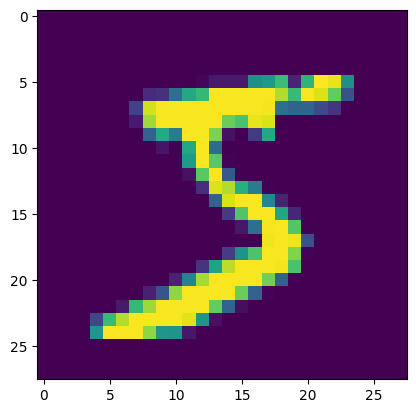

Actual: 0


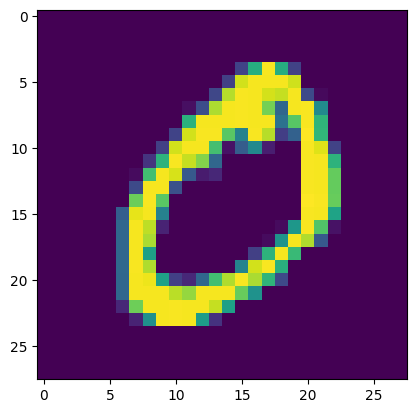

Actual: 0


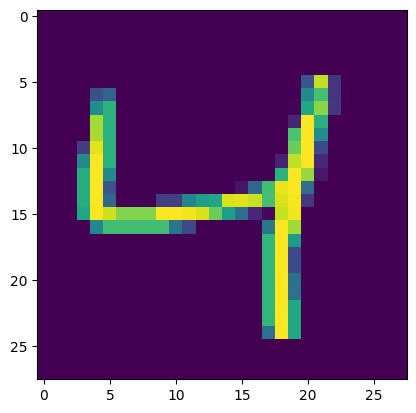

Actual: 0


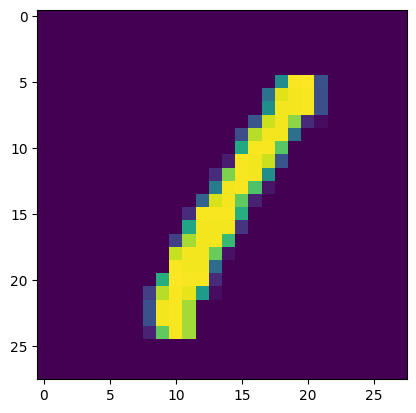

Actual: 0


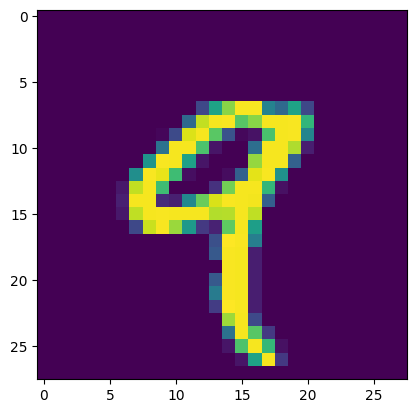

Actual: 0


In [67]:
for i in range(5):
    plt.imshow(X_train[i]) #cmap='gray'
    plt.show()
    print("Actual:",np.argmax(y_train[i]))

## Adding More 9

In [74]:
images_9 = []
folder = '9_s/'
for i in range(30):
    images_9.append(folder+f'pixil-frame-0 ({i+1}).png')

def img_norm(img):
    img = Image.open(img).convert('LA')
    img = np.array(img)
    fimg = []
    for i in range(len(img)):
        for j in range(len(img[i])):
            fimg.append(img[i][j][1])
    fimg = np.array(fimg).reshape(28, 28)
    fimg = fimg / 255.0
    return fimg

images_9 = [img_norm(images_9[i]) for i in range(len(images_9))]

In [76]:
X_train = np.concatenate((X_train, images_9), axis=0)
y_train = np.concatenate((y_train, np.full(len(images_9), 9)), axis=0)

## Image Augmentation

In [77]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [78]:
shifter = []
for i in range(1,5):
    shifter.append([i,0])
    shifter.append([-i,0])
    shifter.append([0,i])
    shifter.append([0,-i])
    shifter.append([i,-i])
    shifter.append([-i,i])

In [79]:
shifter

[[1, 0],
 [-1, 0],
 [0, 1],
 [0, -1],
 [1, -1],
 [-1, 1],
 [2, 0],
 [-2, 0],
 [0, 2],
 [0, -2],
 [2, -2],
 [-2, 2],
 [3, 0],
 [-3, 0],
 [0, 3],
 [0, -3],
 [3, -3],
 [-3, 3],
 [4, 0],
 [-4, 0],
 [0, 4],
 [0, -4],
 [4, -4],
 [-4, 4]]

In [80]:
X_train_augmented = [image.reshape([-1]) for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in shifter:
     for image, label in zip(X_train, y_train):
        tmpp_array = shift_image(image, dx, dy)
        X_train_augmented.append(tmpp_array.tolist())
        y_train_augmented.append(label)

In [81]:
len(X_train_augmented)

1500750

In [82]:
X_train_augmented = np.vstack(X_train_augmented)

In [86]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

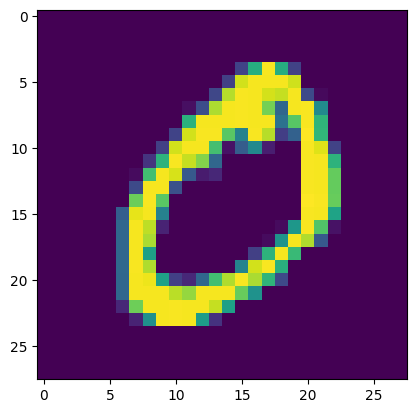

In [87]:
plt.imshow(X_train_augmented[1].reshape(28,28))
plt.show()

In [108]:
X_train = X_train_augmented.reshape(-1, 28, 28, 1)
y_train = y_train_augmented

In [107]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

## Sequential API

In [90]:
model = Sequential(name='CNN_2D_MNIST_21BCM054')
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Model Class API

In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "CNN_2D_MNIST_21BCM054"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 256)     

In [92]:
model.fit(X_train,y_train,epochs=15,verbose=1)

Epoch 1/15
46899/46899 [==============================] - 322s 7ms/step - loss: 0.0421 - accuracy: 0.9871
Epoch 2/15
46899/46899 [==============================] - 323s 7ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 3/15
46899/46899 [==============================] - 320s 7ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 4/15
46899/46899 [==============================] - 327s 7ms/step - loss: 0.0119 - accuracy: 0.9967
Epoch 5/15
46899/46899 [==============================] - 331s 7ms/step - loss: 0.0114 - accuracy: 0.9969
Epoch 6/15
46899/46899 [==============================] - 330s 7ms/step - loss: 0.0110 - accuracy: 0.9972
Epoch 7/15
46899/46899 [==============================] - 331s 7ms/step - loss: 0.0109 - accuracy: 0.9973
Epoch 8/15
46899/46899 [==============================] - 329s 7ms/step - loss: 0.0105 - accuracy: 0.9974
Epoch 9/15
46899/46899 [==============================] - 335s 7ms/step - loss: 0.0104 - accuracy: 0.9975
Epoch 10/15
46899/46899 [=====================

In [93]:
model.evaluate(X_train,y_train)

46899/46899 [==============================] - 113s 2ms/step - loss: 0.0050 - accuracy: 0.9987


[0.005007877014577389, 0.998719334602356]

In [110]:
y_test.shape

(10000, 10)

In [111]:
tmps = [X_test[i].reshape(1,28,28,1) for i in range(len(X_test))]

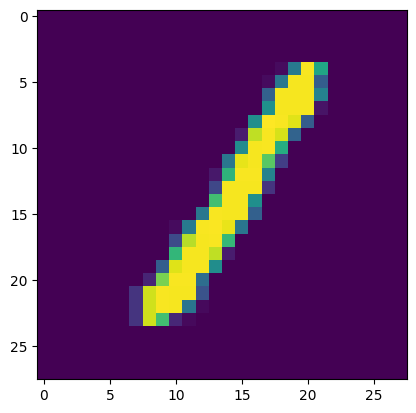

1/1 [==============================] - 0s 23ms/step
Predicted: 1


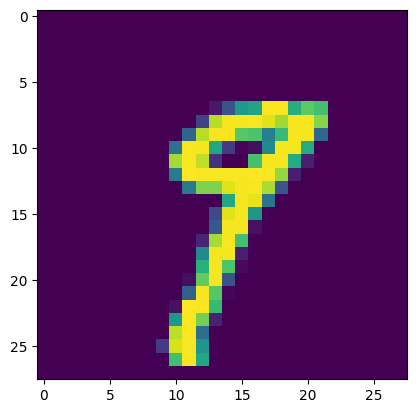

1/1 [==============================] - 0s 10ms/step
Predicted: 9


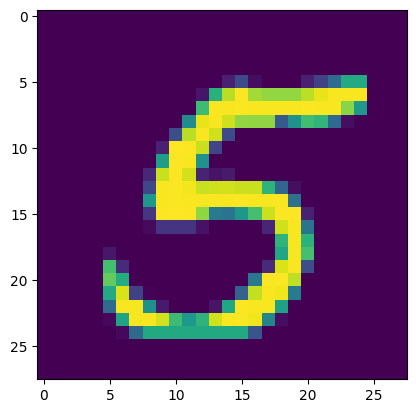

1/1 [==============================] - 0s 11ms/step
Predicted: 5


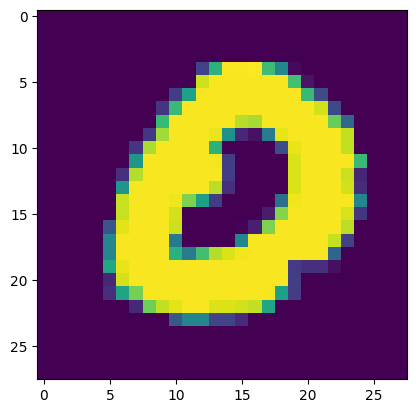

1/1 [==============================] - 0s 10ms/step
Predicted: 0


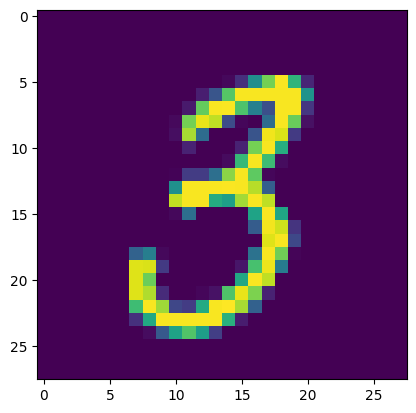

1/1 [==============================] - 0s 11ms/step
Predicted: 3


In [116]:
for i in range(5):
    i = random.randint(0, len(X_test))
    plt.imshow(X_test[i])
    plt.show()
    pred = model.predict(X_test[i].reshape(1, 28, 28, 1))
    print("Predicted:",np.argmax(pred))

In [101]:
model.save('CNN_2D_MNIST_15L.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## PART - 2

In [117]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [118]:
model = tf.keras.models.load_model('CNN_2D_MNIST_21BCM054.h5')

In [119]:
path_img = "pixil-frame-5.png"

In [120]:
def img_norm(img):
    img = Image.open(img).convert('LA')
    img = np.array(img)
    fimg = []
    for i in range(len(img)):
        for j in range(len(img[i])):
            fimg.append(img[i][j][1])
    fimg = np.array(fimg).reshape(28, 28)
    fimg = fimg / 255.0
    fimg = fimg.reshape(1, 28, 28, 1)
    return fimg

def visual(img):
    img = Image.open(img).convert('LA')
    img = np.array(img)
    fimg = []
    for i in range(len(img)):
        for j in range(len(img[i])):
            fimg.append(img[i][j][1])
    fimg = np.array(fimg).reshape(28, 28)
    plt.imshow(fimg)
    plt.show()

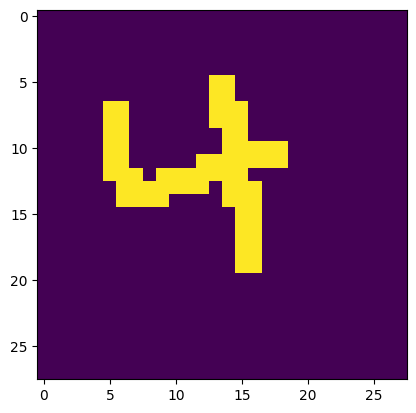

In [121]:
visual(path_img)

In [122]:
fimg = img_norm(path_img)
pred = model.predict(fimg)
print("Predicted:",np.argmax(pred))

1/1 [==============================] - 0s 45ms/step
Predicted: 4


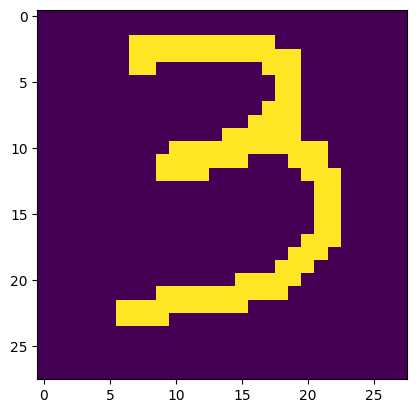

In [123]:
path_img2 = "pixil-frame-0.png"
visual(path_img2)

In [124]:
fimg2 = img_norm(path_img2)
pred2 = model.predict(fimg2)
print("Predicted:",np.argmax(pred2))

1/1 [==============================] - 0s 11ms/step
Predicted: 3


## Competetion

In [59]:
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
model = tf.keras.models.load_model('CNN_2D_MNIST_21BCM054.h5')

In [61]:
data_submissions = pd.read_csv('test_submi.csv')
df = data_submissions
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df.shape

(28000, 784)

In [63]:
X = np.array(df.iloc[:,:]).reshape(-1,28,28,1)

In [64]:
pred = model.predict(X)

875/875 [==============================] - 3s 4ms/step


In [65]:
df_submissions  = dict()
for i in range(len(pred)):
    df_submissions[i+1] = np.argmax(pred[i])

In [66]:
df_submissions = pd.DataFrame(df_submissions.items(), columns=['ImageId', 'Label'])
df_submissions.to_csv('submissions.csv', index=False)

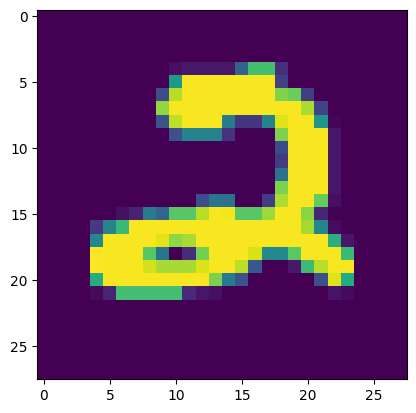

1/1 [==============================] - 0s 39ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


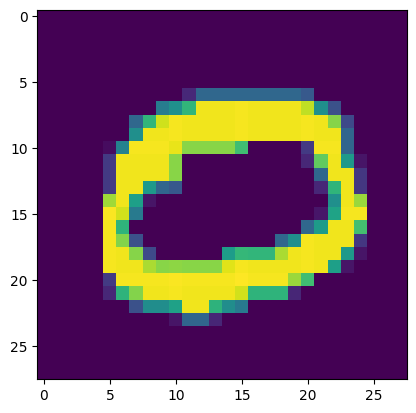

1/1 [==============================] - 0s 12ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


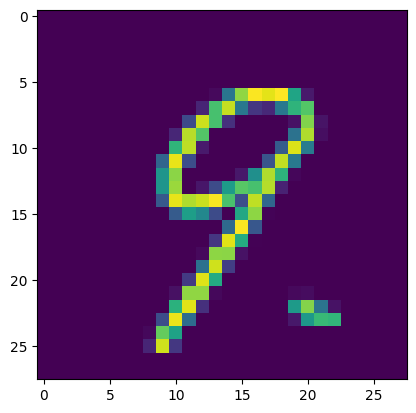

1/1 [==============================] - 0s 12ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


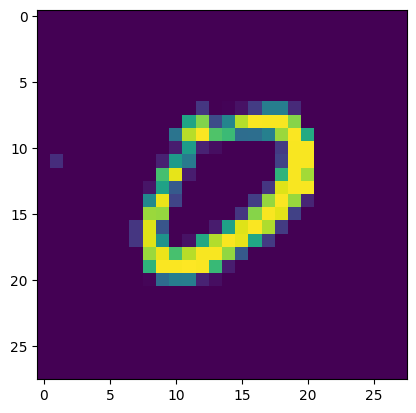

1/1 [==============================] - 0s 11ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


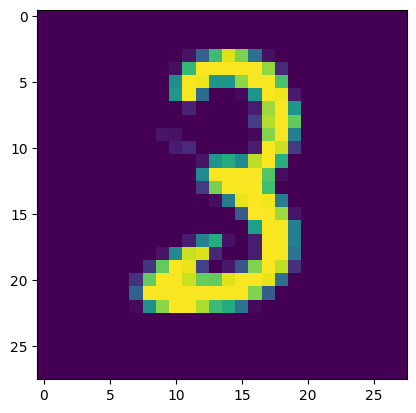

1/1 [==============================] - 0s 13ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


: 

In [67]:
for i in range(5):
    plt.imshow(X[i].reshape(28,28))
    plt.show()
    predx = model.predict(X[i].reshape(1,28,28,1))
    print(predx)